Group Size | Probability of Shared Birthday
----------------------------------------
       10 | 0.116948 (11.69%)
       20 | 0.411438 (41.14%)
       23 | 0.507297 (50.73%)
       30 | 0.706316 (70.63%)
       40 | 0.891232 (89.12%)
       50 | 0.970374 (97.04%)
       60 | 0.994123 (99.41%)
       70 | 0.999160 (99.92%)
       80 | 0.999914 (99.99%)

Interesting Facts:
- With just 23 people, the probability is 50.73%
- You need 57 people for a 99% chance of a shared birthday

Experiment with 23 people:
- 23 birthdays generated
- 22 unique birthdays
- Shared birthday? Yes
- Days with shared birthdays: [103]


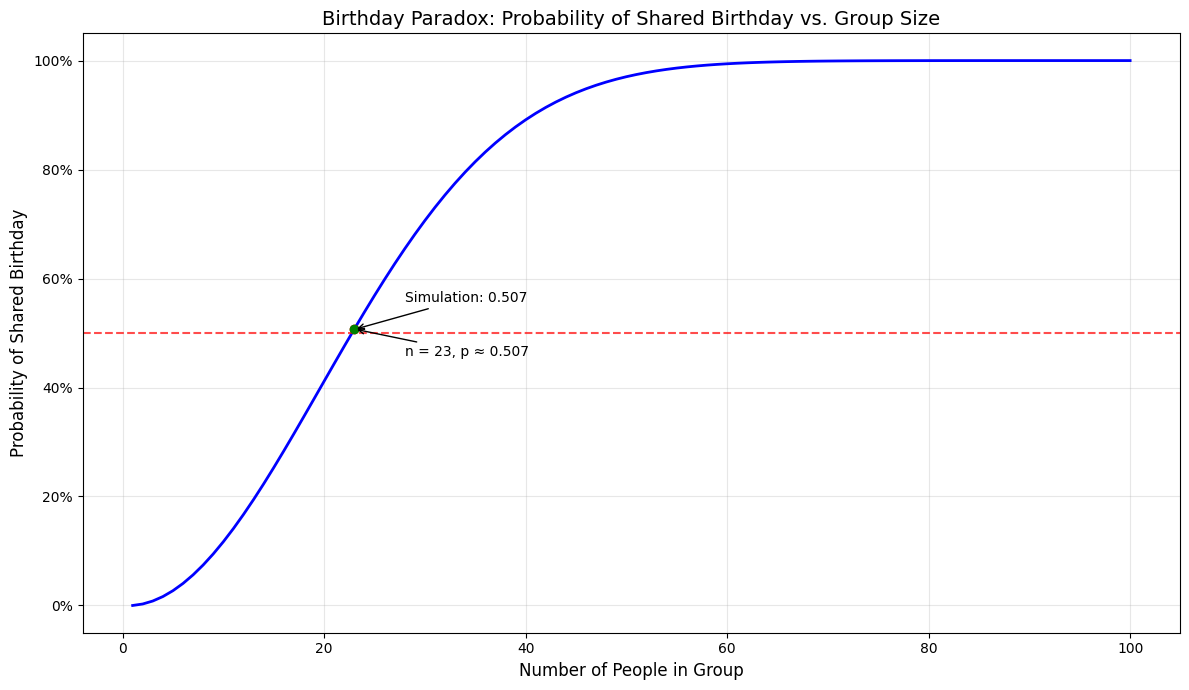

In [5]:
#### Implemented by Arthur (Ali) Vahedi (Please check other repositories!)


import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import PercentFormatter

# Function to calculate the exact probability of at least one shared birthday in a group of n people
def calculate_probability(n):
    if n > 365:
        return 1.0  # If more people than days, probability is 100%
    
    # Calculate probability of NO shared birthdays
    # This is (365/365) * (364/365) * (363/365) * ... * (365-n+1)/365
    prob_no_match = 1.0
    for i in range(n):
        prob_no_match *= (365 - i) / 365
    
    # Probability of at least one match
    return 1 - prob_no_match

# Monte Carlo simulation of the birthday paradox
def simulate_birthday_paradox(n, num_simulations=10000):
    """
    Simulates the birthday paradox for a group of n people, num_simulations times.
    Returns the proportion of simulations that had at least one shared birthday.
    """
    matches = 0
    
    for _ in range(num_simulations):
        # Generate random birthdays for n people (1-365)
        birthdays = np.random.randint(1, 366, size=n)
        
        # Check if any birthdays are shared
        if len(birthdays) != len(set(birthdays)):
            matches += 1
    
    return matches / num_simulations

# Calculate probabilities for different group sizes
group_sizes = range(1, 101)
theoretical_probs = [calculate_probability(n) for n in group_sizes]

# Create the plot
plt.figure(figsize=(12, 7))
plt.plot(group_sizes, theoretical_probs, 'b-', linewidth=2)

# Add a horizontal line at 50% probability
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)

# Find and mark the smallest group size with >50% probability
for n, prob in zip(group_sizes, theoretical_probs):
    if prob > 0.5:
        plt.plot(n, prob, 'ro')
        plt.annotate(f'n = {n}, p ≈ {prob:.3f}', 
                    xy=(n, prob), xytext=(n+5, prob-0.05),
                    arrowprops=dict(arrowstyle="->", color='black'))
        break

# Add labels and title
plt.xlabel('Number of People in Group', fontsize=12)
plt.ylabel('Probability of Shared Birthday', fontsize=12)
plt.title('Birthday Paradox: Probability of Shared Birthday vs. Group Size', fontsize=14)
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

# Now let's also run a simulation to demonstrate
n_people = 23  # Classic case with ~50% probability
n_simulations = 10000
simulated_prob = simulate_birthday_paradox(n_people, n_simulations)
theoretical_prob = calculate_probability(n_people)

# Add simulation result to the plot
plt.plot(n_people, simulated_prob, 'go')
plt.annotate(f'Simulation: {simulated_prob:.3f}', 
            xy=(n_people, simulated_prob), xytext=(n_people+5, simulated_prob+0.05),
            arrowprops=dict(arrowstyle="->", color='black'))

# Generate a table of values for reference
interesting_group_sizes = [10, 20, 23, 30, 40, 50, 60, 70, 80]
print("Group Size | Probability of Shared Birthday")
print("-" * 40)
for n in interesting_group_sizes:
    print(f"{n:9d} | {calculate_probability(n):.6f} ({calculate_probability(n)*100:.2f}%)")

# Add some additional interesting statistics
print("\nInteresting Facts:")
print(f"- With just 23 people, the probability is {calculate_probability(23)*100:.2f}%")

# Find the group size needed for 99% probability
for n in group_sizes:
    if calculate_probability(n) >= 0.99:
        print(f"- You need {n} people for a 99% chance of a shared birthday")
        break

# Run a specific simulation example
np.random.seed(42)  # For reproducibility
group_size = 23
birthdays = np.random.randint(1, 366, size=group_size)
unique_birthdays = set(birthdays)
print(f"\nExperiment with {group_size} people:")
print(f"- {len(birthdays)} birthdays generated")
print(f"- {len(unique_birthdays)} unique birthdays")
print(f"- Shared birthday? {'Yes' if len(birthdays) != len(unique_birthdays) else 'No'}")

if len(birthdays) != len(unique_birthdays):
    # Find which birthdays are shared
    from collections import Counter
    counts = Counter(birthdays)
    shared = [day for day, count in counts.items() if count > 1]
    print(f"- Days with shared birthdays: {shared}")

plt.tight_layout()
plt.savefig("birthday_paradox.pdf", dpi=300, facecolor='white')
plt.show()